# Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_data = pd.read_csv('sales_data.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
sales_data.shape

(186850, 6)

In [4]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


#### Clean up the data!

In [5]:
# Find rows with any NaN
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nan_df.shape

(545, 6)

In [7]:
print('Looks like there are '+str(nan_df.shape[0])+' rows with atleast one NaN!')

Looks like there are 545 rows with atleast one NaN!


#### Drop rows with NaN

In [8]:
sales_data = sales_data.dropna()
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
sales_data.shape

(186305, 6)

In [10]:
sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Convert columns to correct data type

In [11]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')
sales_data = sales_data.dropna(subset=['Order Date'])

In [12]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])
sales_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### Augment data with additional columns

##### Create a 'Month' column from 'Order Date' column

In [13]:
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


##### Create a Sales column

In [14]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Add a City column

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return (address.split(',')[2]).split(' ')[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: get_city(x)+' ('+get_state(x)+')')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Analysis

#### What was the best month for sales, and how much was earned that month?

In [16]:
monthly_sales = sales_data.groupby('Month')['Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

Let's plot this!

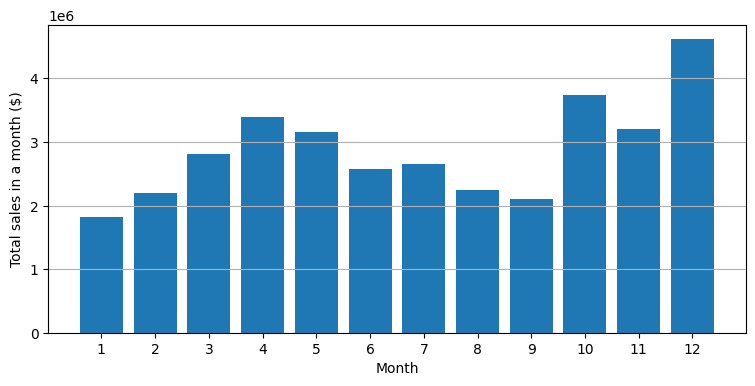

In [17]:
plt.figure(figsize=(9,4))
plt.bar(monthly_sales.index,monthly_sales)
plt.xticks(monthly_sales.index)
plt.ylabel('Total sales in a month ($)')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

In [18]:
print(f"Thus, the best month in sales was Month {monthly_sales.idxmax()} with a sale of " + "${:,.2f}".format(monthly_sales.max()))

Thus, the best month in sales was Month 12 with a sale of $4,613,443.34


So, December being the best month in sales followed by October, April and November can be explained by the festivities that are in these months. Generaly in December, shopping spends peak around Christmas and New Year's and is closely followed by the festivities in the other months respectively.

#### What city has the highest sales?

In [19]:
city_sales = sales_data.groupby('City')['Sales'].sum() 
city_sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

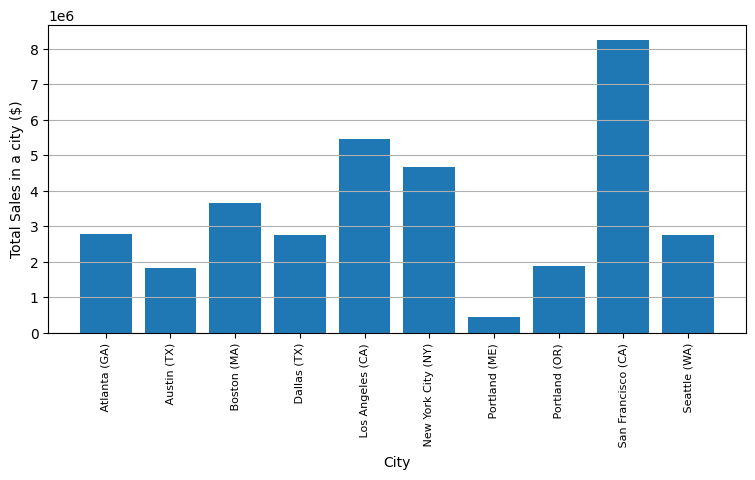

In [20]:
plt.figure(figsize=(9,4))
plt.bar(city_sales.index,city_sales)
plt.xticks(city_sales.index, rotation='vertical', size=8)
plt.ylabel('Total Sales in a city ($)')
plt.xlabel('City')
plt.grid(axis='y')
plt.show()

In [21]:
print(f"Thus, the best city in sales was {city_sales.idxmax()} with a sale of " + "${:,.2f}".format(city_sales.max()))

Thus, the best city in sales was  San Francisco (CA) with a sale of $8,262,203.91


#### What time should we display advertisements to maximize likehood of customers buying products?

##### Add a 'Hour' column

In [22]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour

In [23]:
hourly_sales = sales_data.groupby('Hour')['Order ID'].count()
hourly_sales

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

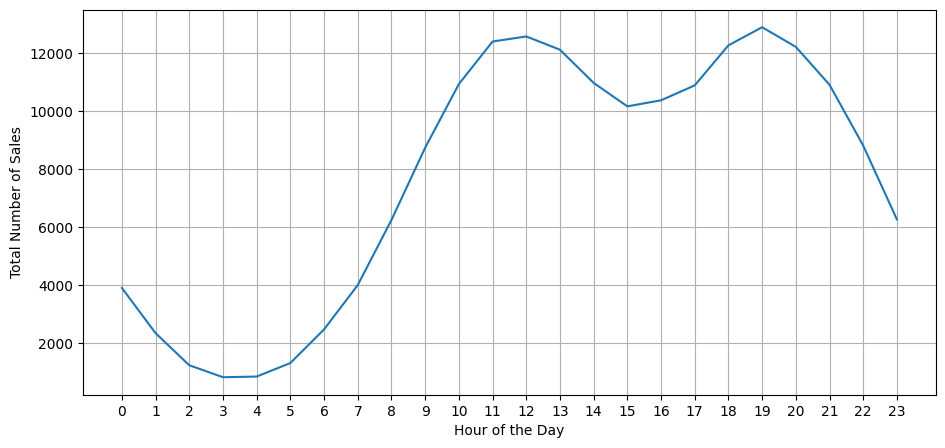

In [24]:
plt.figure(figsize=(11,5))
plt.plot(hourly_sales.index, hourly_sales)
plt.xticks(hourly_sales.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Sales')
plt.grid()
plt.show()

In [25]:
print(f"Thus, the best hour for sales was {hourly_sales.idxmax()} with a count of " + "${:,.2f}".format(hourly_sales.max()))

Thus, the best hour for sales was 19 with a count of $12,905.00


From the chart above, it is clearly evident that the peaks in shopping occur around 12 pm (1200 hrs) and 7 pm (1900 hrs) across the entire 10 US cities. 

#### What products are most often sold together?

Here, by carefully observing the data, we can say that if the Order ID of two or more rows match, the corresponding Products were sold together.

In [26]:
# Keeping only the ones which have duplicated Order ID
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]

# Joining all the Products with same Order ID by ',' and storing in 'Grouped' column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Take only the Order ID and Grouped columns and drop duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


Now we can count number of occurences of the combinations.

In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


iPhone and Lightning Charging Cable are sold together the most!! 1005 times!!

### For more than 2 items taken at a time

In [28]:
sales_data.groupby('Order ID').count().sort_values(['Product'], axis=0, ascending=False)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,
160873,5,5,5,5,5,5,5,5,5
296353,4,4,4,4,4,4,4,4,4
196615,4,4,4,4,4,4,4,4,4
165665,4,4,4,4,4,4,4,4,4
226625,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
141266,1,1,1,1,1,1,1,1,1
141267,1,1,1,1,1,1,1,1,1
141268,1,1,1,1,1,1,1,1,1


From the above table we can see that a particular Order ID occurs at most 5 times.

In [29]:
from itertools import combinations
from collections import Counter

for comb in range(2, 6):
    count = Counter()
    print(f"\nTaking {comb} items at a time:")
    for row in df['Grouped']:
        row_list = row.split(',')
        count.update(Counter(combinations(row_list, comb)))
    
    for key, value in count.most_common(10):
        print(key, value)


Taking 2 items at a time:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

Taking 3 items at a time:
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-

### Question 5: What product sold the most? Why do you think it sold the most?

In [30]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

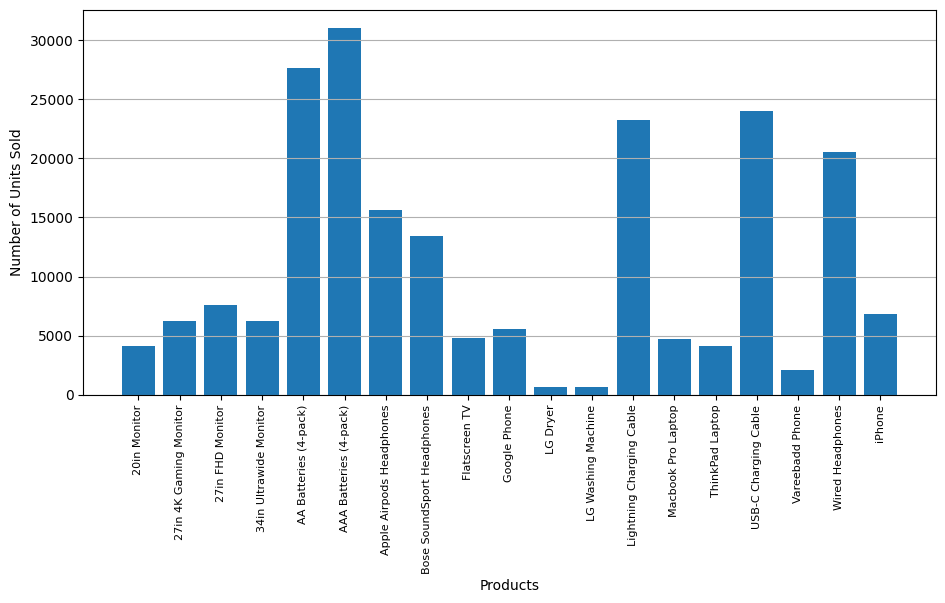

In [31]:
products = quantity_ordered.index
plt.figure(figsize=(11,5))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Number of Units Sold')
plt.xlabel('Products')
plt.grid(axis='y')
plt.show()

In [32]:
print(f"Thus, the best product was {quantity_ordered.idxmax()} with a count of " + "${:,.2f}".format(quantity_ordered.max()))

Thus, the best product was AAA Batteries (4-pack) with a count of $31,017.00


We can say that AAA Batteries (4-pack) were the most. This may be because the per unit price of this item is lowest. Let's see if we are correct!

In [33]:
prices = sales_data.groupby('Product')['Price Each'].mean().sort_values()
prices

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

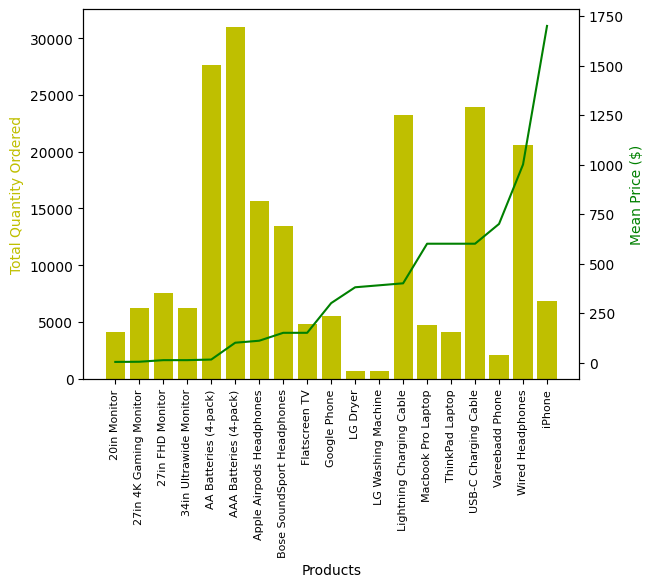

In [34]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='y')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_ylabel('Total Quantity Ordered', color='y')
ax1.set_xlabel('Products')

ax2.plot(products, prices, color='g')
ax2.set_ylabel('Mean Price ($)', color='g')
plt.show()

So, we see an inverse correlation in the Quantity Ordered and Mean Prices. There are some inconsistencies such as Macbook Pro Laptop as greater price than LG Dryer but still Quantity Ordered is more for Mackbook Pro Laptop than for LG Dryer. This may be because demand is more for Macbook Pro Laptop than for LG Dryer.